In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [61]:
a = pd.read_csv('/content/iris.csv')
print(a)

     Unnamed: 0  Sepal.Length  Sepal.Width  Petal.Length  Petal.Width  \
0             1           5.1          3.5           1.4          0.2   
1             2           4.9          3.0           1.4          0.2   
2             3           4.7          3.2           1.3          0.2   
3             4           4.6          3.1           1.5          0.2   
4             5           5.0          3.6           1.4          0.2   
..          ...           ...          ...           ...          ...   
145         146           6.7          3.0           5.2          2.3   
146         147           6.3          2.5           5.0          1.9   
147         148           6.5          3.0           5.2          2.0   
148         149           6.2          3.4           5.4          2.3   
149         150           5.9          3.0           5.1          1.8   

       Species  
0       setosa  
1       setosa  
2       setosa  
3       setosa  
4       setosa  
..         ...  
145 

In [62]:
print(a.head())

   Unnamed: 0  Sepal.Length  Sepal.Width  Petal.Length  Petal.Width Species
0           1           5.1          3.5           1.4          0.2  setosa
1           2           4.9          3.0           1.4          0.2  setosa
2           3           4.7          3.2           1.3          0.2  setosa
3           4           4.6          3.1           1.5          0.2  setosa
4           5           5.0          3.6           1.4          0.2  setosa


In [63]:
print(a.shape)

(150, 6)


In [64]:
print(a.describe())

       Unnamed: 0  Sepal.Length  Sepal.Width  Petal.Length  Petal.Width
count  150.000000    150.000000   150.000000    150.000000   150.000000
mean    75.500000      5.843333     3.057333      3.758000     1.199333
std     43.445368      0.828066     0.435866      1.765298     0.762238
min      1.000000      4.300000     2.000000      1.000000     0.100000
25%     38.250000      5.100000     2.800000      1.600000     0.300000
50%     75.500000      5.800000     3.000000      4.350000     1.300000
75%    112.750000      6.400000     3.300000      5.100000     1.800000
max    150.000000      7.900000     4.400000      6.900000     2.500000


In [65]:
print(a.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    150 non-null    int64  
 1   Sepal.Length  150 non-null    float64
 2   Sepal.Width   150 non-null    float64
 3   Petal.Length  150 non-null    float64
 4   Petal.Width   150 non-null    float64
 5   Species       150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None


In [66]:
print(a['Species'].value_counts())

setosa        50
versicolor    50
virginica     50
Name: Species, dtype: int64


In [67]:
print(a.isnull().sum())

Unnamed: 0      0
Sepal.Length    0
Sepal.Width     0
Petal.Length    0
Petal.Width     0
Species         0
dtype: int64


Axes(0.125,0.11;0.775x0.77)


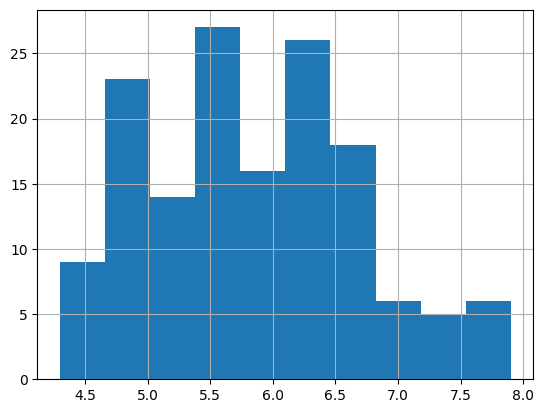

In [68]:
print(a['Sepal.Length'].hist())

Axes(0.125,0.11;0.775x0.77)


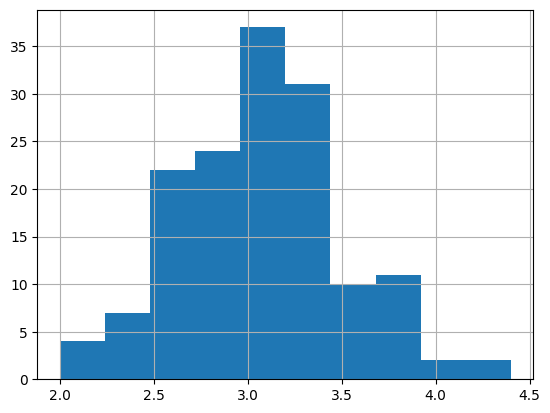

In [69]:
 print(a['Sepal.Width'].hist())

Axes(0.125,0.11;0.775x0.77)


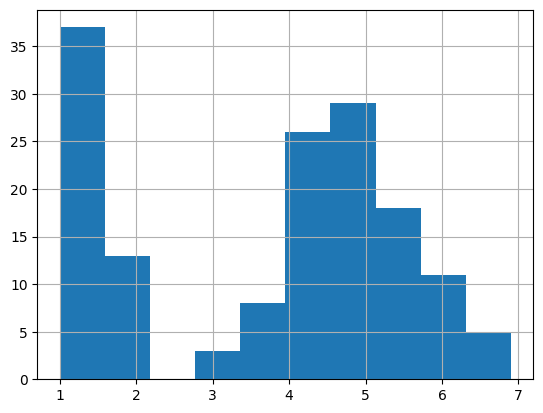

In [70]:
print(a['Petal.Length'].hist())

Axes(0.125,0.11;0.775x0.77)


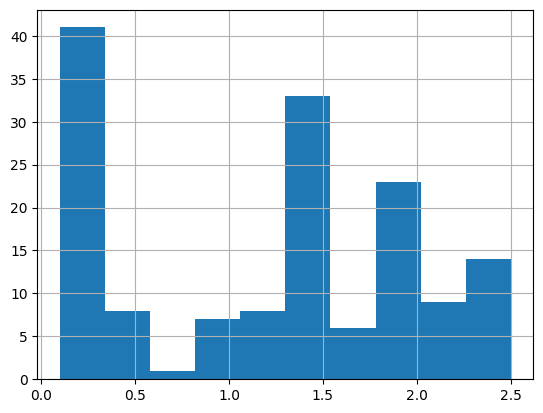

In [71]:
print(a['Petal.Width'].hist())

In [72]:
a.drop(a.columns[0], axis=1, inplace=True)
label_encoder = LabelEncoder()
a['Species'] = label_encoder.fit_transform(a['Species'])
X = a[['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width']]
y = a.Species

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [74]:
print(a.corr())

              Sepal.Length  Sepal.Width  Petal.Length  Petal.Width   Species
Sepal.Length      1.000000    -0.117570      0.871754     0.817941  0.782561
Sepal.Width      -0.117570     1.000000     -0.428440    -0.366126 -0.426658
Petal.Length      0.871754    -0.428440      1.000000     0.962865  0.949035
Petal.Width       0.817941    -0.366126      0.962865     1.000000  0.956547
Species           0.782561    -0.426658      0.949035     0.956547  1.000000


<Axes: >

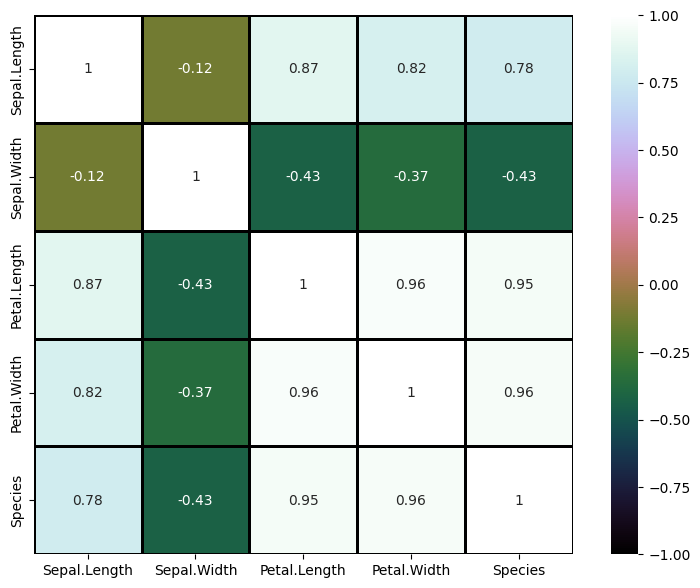

In [75]:
# Correlation heatmap
fig = plt.gcf()
fig.set_size_inches(10, 7)
sns.heatmap(a.corr(), annot=True, cmap='cubehelix', linewidths=1, linecolor='k', square=True, mask=False, vmin=-1, vmax=1,cbar_kws={"orientation": "vertical"})

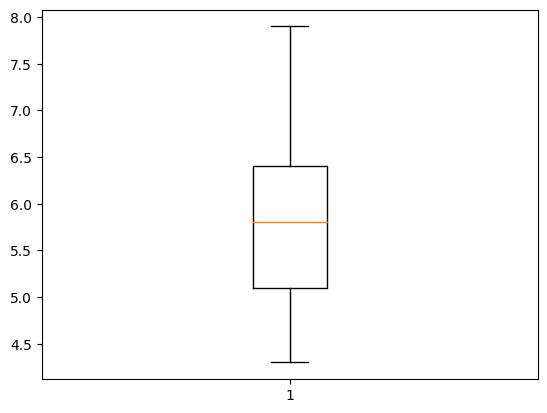

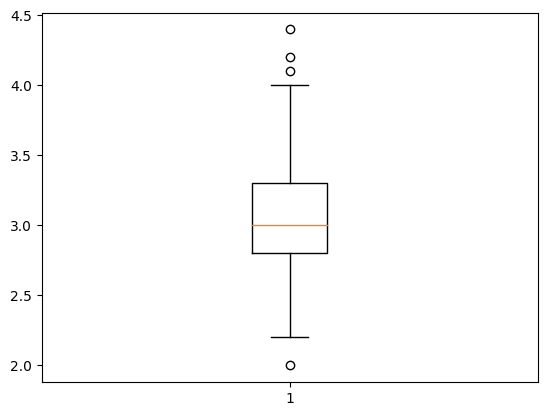

In [76]:
# Boxplots
plt.figure(1)
plt.boxplot([a['Sepal.Length']])
plt.figure(2)
plt.boxplot([a['Sepal.Width']])
plt.show()

Text(0.5, 1.0, 'Barplot of Petal Length by Species')

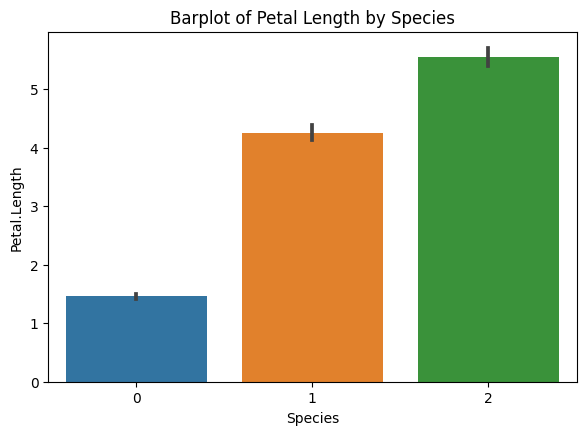

In [77]:
# Barplots
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
sns.barplot(x='Species', y='Petal.Length', data=a)
plt.title('Barplot of Petal Length by Species')

<Axes: xlabel='Sepal.Length', ylabel='Petal.Length'>

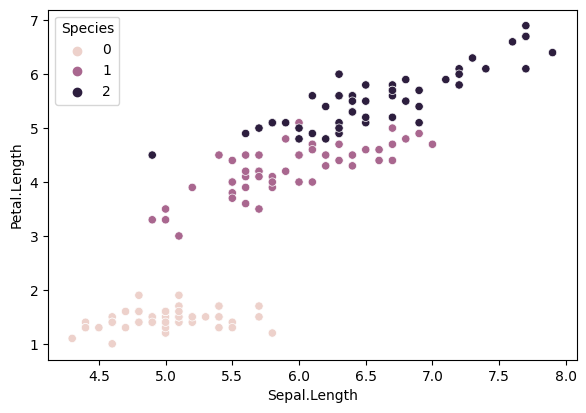

In [78]:
# Scatterplots
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
sns.scatterplot(x='Sepal.Length', y='Petal.Length', hue="Species", data=a)

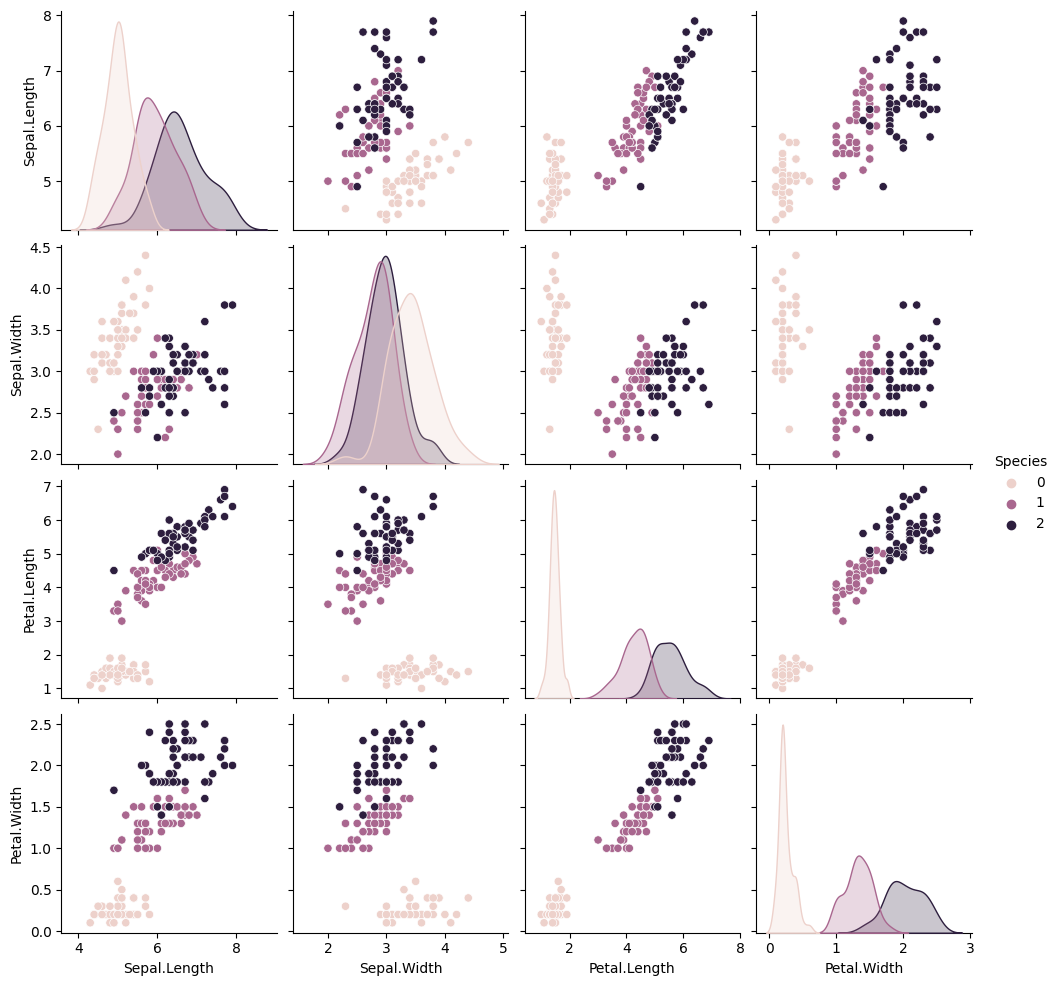

In [79]:
# Pairplot
sns.pairplot(a, hue='Species')

In [80]:
'Model 1: Logistic Regression'
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)
prediction_lr = model_lr.predict(X_test)
print('Accuracy (Logistic Regression):', accuracy_score(prediction_lr, y_test))

Accuracy (Logistic Regression): 1.0


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [81]:
'Model 2: Support Vector Machine (SVM)'
model_svm = SVC()
model_svm.fit(X_train, y_train)
prediction_svm = model_svm.predict(X_test)
print("Accuracy (SVM):", accuracy_score(y_test, prediction_svm))
print("Confusion matrix (SVM): \n", confusion_matrix(y_test, prediction_svm))
print("Classification report (SVM):\n", classification_report(y_test, prediction_svm))

Accuracy (SVM): 1.0
Confusion matrix (SVM): 
 [[10  0  0]
 [ 0 17  0]
 [ 0  0 11]]
Classification report (SVM):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        11

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



In [82]:
'Model 3: Decision Tree Classifier'
model_dt = DecisionTreeClassifier(criterion='entropy', random_state=7)
model_dt.fit(X_train, y_train)
prediction_dt = model_dt.predict(X_test)
print("Accuracy Score (Decision Tree):", accuracy_score(y_test, prediction_dt))
print("Confusion matrix (Decision Tree): \n", confusion_matrix(y_test, prediction_dt))
print("Classification report (Decision Tree):\n", classification_report(y_test, prediction_dt))

Accuracy Score (Decision Tree): 0.9736842105263158
Confusion matrix (Decision Tree): 
 [[10  0  0]
 [ 0 17  0]
 [ 0  1 10]]
Classification report (Decision Tree):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.94      1.00      0.97        17
           2       1.00      0.91      0.95        11

    accuracy                           0.97        38
   macro avg       0.98      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38



In [83]:
'Model 4: Neural Network using TensorFlow'
model_nn = Sequential([
    Dense(64, activation='relu', input_shape=(4,)),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')
])
model_nn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_nn.fit(X_train, y_train, epochs=50, verbose=0)

In [84]:
# Evaluate the Neural Network Model
test_loss, test_acc = model_nn.evaluate(X_test, y_test)
print(f'Accuracy (Neural Network): {test_acc}')
input_data = input("Enter values as:")
input_list = input_data.split(",")
input_data_as_numpy_array = np.asarray(input_list, dtype=float).reshape(1, -1)
input_data_as_numpy_array = np.asarray(input_list, dtype=float).reshape(1, -1)
prediction_lr = model_lr.predict(input_data_as_numpy_array)
prediction_svm = model_svm.predict(input_data_as_numpy_array)
prediction_dt = model_dt.predict(input_data_as_numpy_array)
prediction_nn = np.argmax(model_nn.predict(input_data_as_numpy_array), axis=-1)

2/2 [==============================] - 0s 8ms/step - loss: 0.1743 - accuracy: 1.0000
Accuracy (Neural Network): 1.0
Enter values as:5.0,3.6,1.2,0.6
1/1 [==============================] - 0s 56ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [85]:
print("Prediction (Logistic Regression):", prediction_lr)
print("Prediction (SVM):", prediction_svm)
print("Prediction (Decision Tree):", prediction_dt)
print("Prediction (Neural Network):", prediction_nn)

Prediction (Logistic Regression): [0]
Prediction (SVM): [0]
Prediction (Decision Tree): [0]
Prediction (Neural Network): [0]
